In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("online payment data.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: >

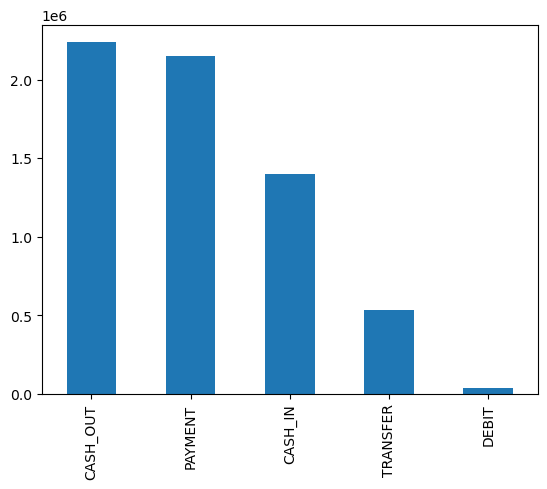

In [8]:
df['type'].value_counts().plot(kind='bar')

In [9]:
df['isFraud'].value_counts()
# too much data Unbalanced data 
# No of flagged and not - diff is too much so we balance the data 

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
sample_size = 8000  # Adjust as needed

# Sample a specific number of rows from each kind
df = df.groupby('isFraud', group_keys=False).apply(lambda x: x.sample(min(len(x), sample_size), random_state=42))

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

In [11]:
df.shape

(16000, 11)

In [12]:
df['step'].value_counts()

18     88
212    76
235    75
16     70
15     70
       ..
693     3
593     3
112     2
662     2
545     2
Name: step, Length: 743, dtype: int64

<Axes: xlabel='step', ylabel='Density'>

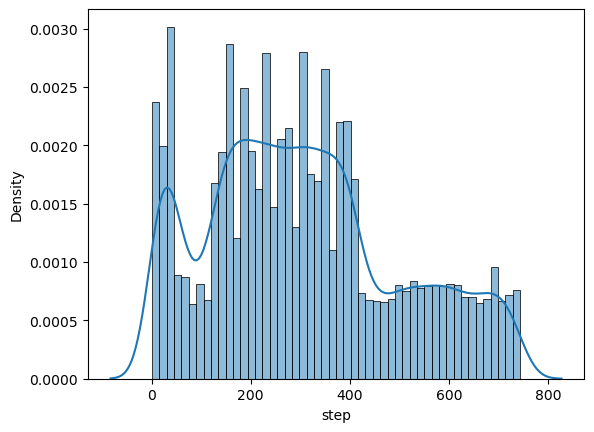

In [13]:
sns.histplot(df['step'], bins=50,kde= True,stat="density", kde_kws=dict(cut=3))

<Axes: >

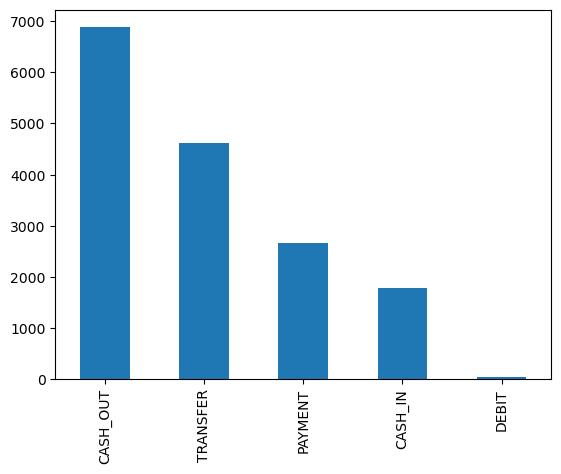

In [14]:
df['type'].value_counts().plot(kind='bar')

<Axes: xlabel='type', ylabel='amount'>

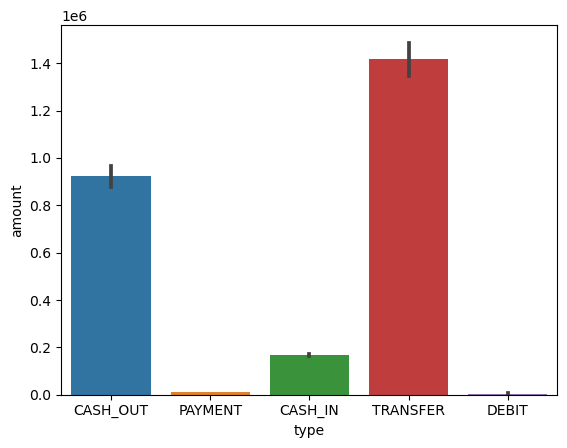

In [15]:
sns.barplot(x=df['type'], y=df['amount'])
# HIgher amounts are tranferred through Transfer and Cash_out

<Axes: xlabel='type', ylabel='isFraud'>

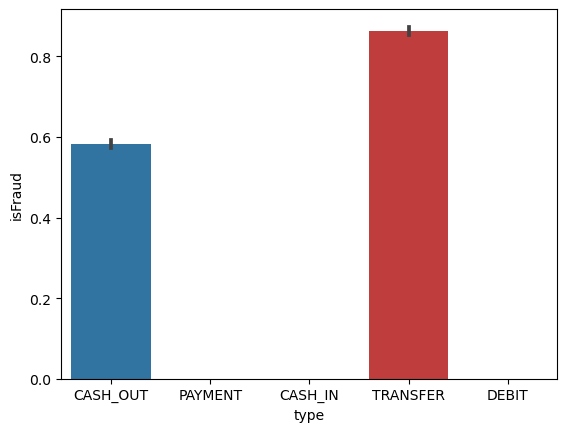

In [16]:
sns.barplot(x=df['type'], y=df['isFraud'])
# Tranfer type has more Fraud count 

<Axes: >

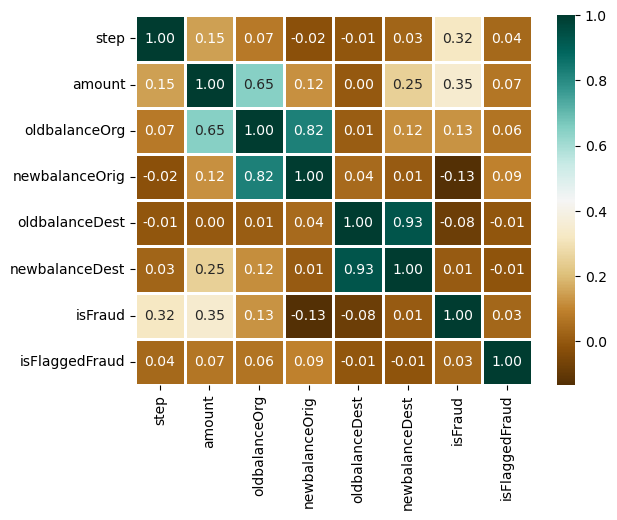

In [17]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix,
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

In [18]:
type_new = pd.get_dummies(df['type'], drop_first=True)
df = pd.concat([df, type_new], axis=1)

In [19]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,162,CASH_OUT,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0,1,0,0,0
1,137,PAYMENT,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0,0,0,1,0
2,179,PAYMENT,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0,0,0,1,0
3,355,PAYMENT,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0,0,0,1,0
4,354,CASH_IN,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0,0,0,0,0


In [20]:
X = df.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Fitting different models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras

def get_model_name(model):
    if isinstance(model, XGBClassifier):
        return 'XGBClassifier()'
    else:
        return repr(model)

models = [LogisticRegression(), XGBClassifier()]

for model in models:
    model.fit(X_train, y_train)
    model_name = get_model_name(model)
    
    print(f'{model_name} :')
    
    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training Accuracy:', ras(y_train, train_preds))
    
    y_preds = model.predict_proba(X_test)[:, 1]
    print('Validation Accuracy:', ras(y_test, y_preds))
    print()

LogisticRegression() :
Training Accuracy: 0.9819950066097242
Validation Accuracy: 0.9838195607667968

XGBClassifier() :
Training Accuracy: 0.9999999999999999
Validation Accuracy: 0.9995746421438314



## Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [26]:
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))

Accuracy:  0.9272916666666666
Precision:  0.9318085556967387


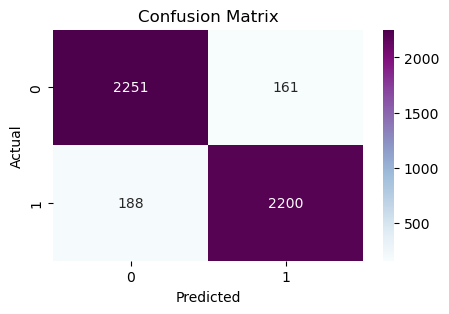

In [27]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## XGBClassifier

In [28]:
model1 = XGBClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [29]:
print('Accuracy: ', accuracy_score(y_test,y_pred1))
print('Precision: ', precision_score(y_test,y_pred1))

Accuracy:  0.9933333333333333
Precision:  0.9887966804979254


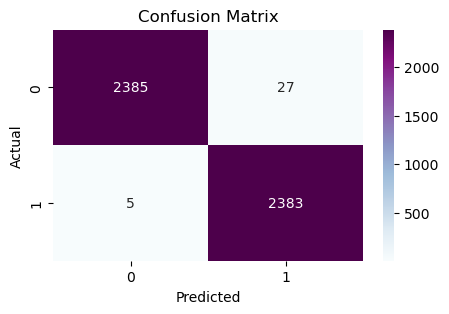

In [30]:
# Confusion matrix for XGBClassifier model

cm = confusion_matrix(y_test, y_pred1)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()